<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#QUESTION-1" data-toc-modified-id="QUESTION-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>QUESTION 1</a></span><ul class="toc-item"><li><span><a href="#Split-The-Dataset" data-toc-modified-id="Split-The-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Split The Dataset</a></span></li><li><span><a href="#Examine-Training-Data-for-Missing-and-Extreme-Values" data-toc-modified-id="Examine-Training-Data-for-Missing-and-Extreme-Values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Examine Training Data for Missing and Extreme Values</a></span></li><li><span><a href="#Create-Histogram-and-Scatter-Plot" data-toc-modified-id="Create-Histogram-and-Scatter-Plot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Create Histogram and Scatter Plot</a></span></li><li><span><a href="#Are-the-data-appropriate-for-linear-regression" data-toc-modified-id="Are-the-data-appropriate-for-linear-regression-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Are the data appropriate for linear regression</a></span></li></ul></li><li><span><a href="#QUESTION-2" data-toc-modified-id="QUESTION-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>QUESTION 2</a></span><ul class="toc-item"><li><span><a href="#Does-the-model-significantly-predict-the-dependent-variable?" data-toc-modified-id="Does-the-model-significantly-predict-the-dependent-variable?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Does the model significantly predict the dependent variable?</a></span></li><li><span><a href="#What-percentage-of-the-variance-in-employees’-salaries-is-accounted-for-by-the-number-of-years-they-have-worked?" data-toc-modified-id="What-percentage-of-the-variance-in-employees’-salaries-is-accounted-for-by-the-number-of-years-they-have-worked?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?</a></span></li></ul></li><li><span><a href="#QUESTION-3" data-toc-modified-id="QUESTION-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>QUESTION 3</a></span></li><li><span><a href="#QUESTION-4" data-toc-modified-id="QUESTION-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>QUESTION 4</a></span></li><li><span><a href="#QUESTION-5" data-toc-modified-id="QUESTION-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>QUESTION 5</a></span></li><li><span><a href="#QUESTION-6" data-toc-modified-id="QUESTION-6-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>QUESTION 6</a></span></li><li><span><a href="#QUESTION-7" data-toc-modified-id="QUESTION-7-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>QUESTION 7</a></span></li></ul></div>

# QUESTION 1

Split your data into a training and test set. Leave the test set for now. Examine the training data for missing and extreme values. Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

## Split The Dataset

In [88]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

# load the salary dataset
df = pd.read_csv('salary.csv')

# split the data
train, test = train_test_split(df, test_size=.2)
print(train.shape, test.shape)

(411, 11) (103, 11)


## Examine Training Data for Missing and Extreme Values

In [18]:
# search for missing values
x = train.isnull().sum()
x

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

There is one missing value for the variable salary. Plan of action is to replace it with the mean.

In [19]:
# replace the missing value with the mean
train['salary'] = train.fillna(train['salary'].mean())

# checking for missing values
x1 = train.isnull().sum()
x1

/home/recruit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [20]:
# detecting extreme values using IQR
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# removing outliers from the dataset
train_out = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

train_out.shape

(298, 11)

## Create Histogram and Scatter Plot

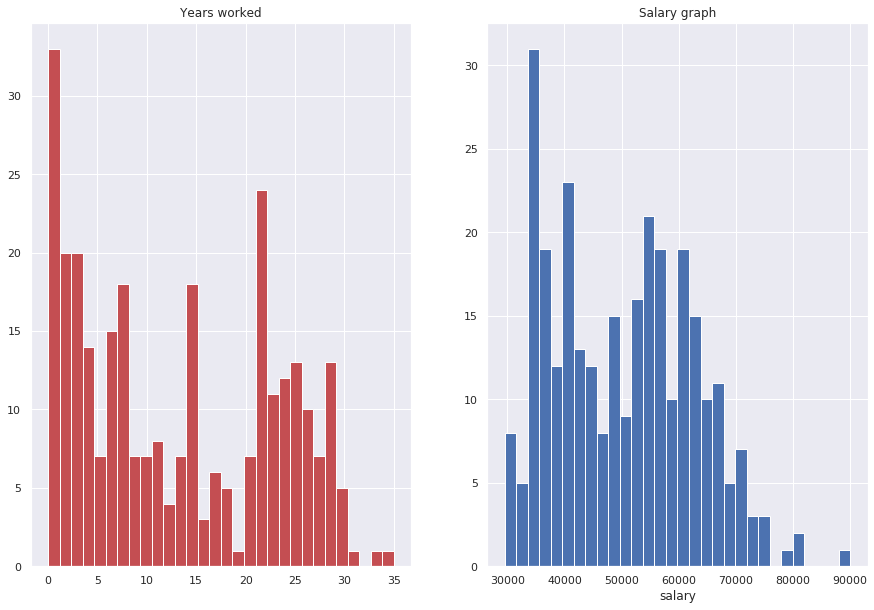

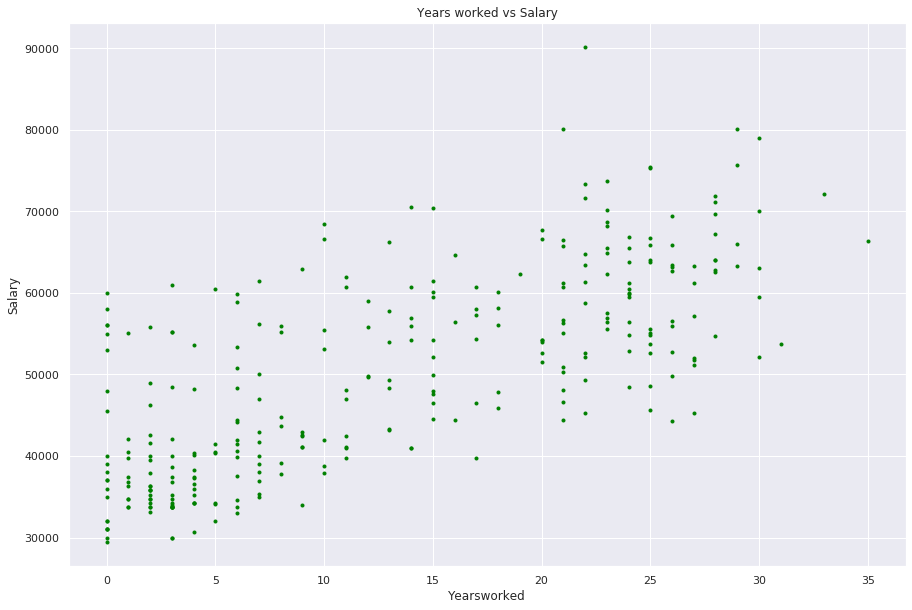

In [34]:
# create new data frame 
train_new = pd.DataFrame(train_out, columns=['salary', 'yearsworked'])
salary = train_new.salary
yearsworked = train_new.yearsworked

#plot histograms and scatter plot
sns.set()

plt.subplots(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Years worked")
plt.hist(yearsworked, color='r', bins=30)
plt.xlabel("")
plt.ylabel("")

plt.subplot(1,2,2)
plt.title("Salary graph")
plt.hist(salary, bins=30, color='b')
plt.xlabel("salary")
plt.ylabel("")

# making a scatter plot
_ = sns.set()

_ = plt.figure(figsize=(15,10))
_ = plt.plot(yearsworked, salary, marker='.', linestyle='none', color='green')
_ = plt.xlabel('Yearsworked')
_ = plt.ylabel('Salary')
_ = plt.title('Years worked vs Salary')
_ = plt.show()

## Are the data appropriate for linear regression

ASSUMPTION 1: The Dependent and Independent variable must have a linear relationship

Analyzing the Salary vs Years Worked Scatter Plot, it is clear that there is a linear relationship between salary and years worked, therefore first assumption of a Linear Regression has been satisfied.

In [22]:
# ASSUMPTION 2: No Autocorrelation in residuals

# import modules
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('salary ~ yearsworked', data=train_new).fit()

# Inpect Results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     328.5
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           6.57e-50
Time:                        11:20:48   Log-Likelihood:                -3118.6
No. Observations:                 298   AIC:                             6241.
Df Residuals:                     296   BIC:                             6249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.821e+04    823.756     46.389      

Auto correlation is a characteristic of data which shows the degree of similarity between the values of the same variables over successive time intervals.

When autocorrelation is detected in the residuals from a model, it suggests that the model is misspecified (i.e., in some sense wrong). A cause is that some key variable or variables are missing from the model.

We test for correlation using the Durbin-Watson test.The DW statistic always has a value between zero and 4.0. A value of 2.0 means there is no autocorrelation detected in the sample. Values from zero to 2.0 indicate positive autocorrelation and values from 2.0 to 4.0 indicate negative autocorrelation.

According to the above results (Durbin-Watson:2.064), we can conclude that the model has no autocorrelation.

In [23]:
# ASSUMPTION 3: no heteroskedasticity
label = ['LM statistic', 'LM-Test p-value', 'F-statistic', 'F-test p-value']

# test for heteroskedasticity using the Breusch-Pagan Test
bp_test = sms.het_breuschpagan(results.resid, results.model.exog)
print(dict(zip(label, bp_test)))

{'LM statistic': 0.011136276461673589, 'LM-Test p-value': 0.9159564108371478, 'F-statistic': 0.01106194973688084, 'F-test p-value': 0.9163075450105077}


In simple terms, heteroskedasticity is any set of data that isn’t homoscedastic. More technically, it refers to data with unequal variability (scatter) across a set of second, predictor variables. 

If you are running any kind of regression analysis, having data that shows heteroskedasticity can ruin your results (at the very least, it will give you biased coefficients)

From the Breusch-Pagan Test Results, heteroskedasticity is indicated if p <0.05, so according to these tests, this model is not heteroskedastic.

In [24]:
# ASSUMPTION 4: residuals are normally distributed
label = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']

# test for normality using the Jarque-Bera Test
jb_test = sms.jarque_bera(results.resid)
print(dict(zip(label, jb_test)))


{'Jarque-Bera': 26.950187224688598, 'Chi^2 two-tail prob.': 1.4055334994453574e-06, 'Skew': 0.7313429690678747, 'Kurtosis': 3.1761667492351253}


Ordinary Least Squares (OLS) Linear Regression does not require that the error term follows a normal distribution to produce unbiased estimates with the minimum variance. However, satisfying this assumption allows you to perform statistical hypothesis testing and generate reliable confidence intervals and prediction intervals.

The Jarque-Bera test statistic tests the null that the data is normally distributed against an alternative that the data follow some other distribution. The test statistic is based on two moments of the data, the skewness, and the kurtosis.

A tiny p-value and a large chi-square value from this test means that you can reject the null hypothesis that the data is normally distributed. 

# QUESTION 2

Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

    Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.
    What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?


In [35]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('salary ~ yearsworked', data=train_new).fit()

# Inpect Results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     328.5
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           6.57e-50
Time:                        12:10:30   Log-Likelihood:                -3118.6
No. Observations:                 298   AIC:                             6241.
Df Residuals:                     296   BIC:                             6249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.821e+04    823.756     46.389      

## Does the model significantly predict the dependent variable?

R-square shows the total variation for the dependent variable that could be explained by the independent variables. A value greater than 0.5 shows that the model is effective enough to determine the relationship. In this case, the value is .526, which is good.

Generally, 95% confidence interval or 5% level of the significance level is chosen for the study. Thus the p-value should be less than 0.05. In the above table, the p-values are 0.000. Therefore, the results are statistically significant.

## What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

The Adjusted R-Squared value of 0.52 indicates that the model (explanatory variable: number of years worked) explains approximately 52 percent of the variation in the dependent variable (salary).

# QUESTION 3

**What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?**

In [95]:
# print the coefficients
results.params

Intercept      38213.590236
yearsworked      915.361970
dtype: float64

The intercept is the value of the value of the salary earned when the number of years worked is 0. Thus one unit increase in the number of years worked will result with a 915.36 unit increase in salary earned. Note that if an increase in years worked was associated with a decrease in salary, $\beta_1$ would be negative. Thus, in this case our $\beta_1$ suggest a positive relationship between years worked and salary.

# QUESTION 4

**What do the 95% confidence intervals [0.025, 0.975] mean?**

In [94]:
# print the confidence intervals for the model coefficients
results.conf_int()

,0,1
Intercept,36592.428911,39834.751560
yearsworked,815.967834,1014.756106


Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

# QUESTION 5

**Calculate the expected salary for someone with 12 years’ work experience.**

In [86]:
# create data frame
x_12 = pd.DataFrame({'yearsworked':[12]}, index=['Year_12 Salary:'])

# predict salary after 12 years' work experience
pred_12 = results.predict(x_12)
pred_12

Year_12 Salary:    49197.933874
dtype: float64

# QUESTION 6

**Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?**

In [87]:
# create data frame
x_80 = pd.DataFrame({'yearsworked':[80]}, index=['Year_80 Salary:'])

# predict salary with 80 years' work experience
pred_80 = results.predict(x_80)
pred_80

Year_80 Salary:    111442.547821
dtype: float64

# QUESTION 7

**We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?**

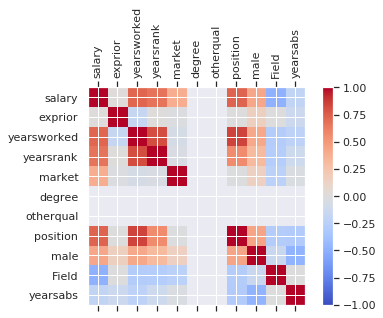

In [92]:
# plot heatmap to find correlation of multiple variables
corr = train_out.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train_out.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train_out.columns)
ax.set_yticklabels(train_out.columns)
plt.show()

The above diagram shows the correlation between variables of the dataset. When there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray.

The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation.

The following variables (experior, degree, and otherqual) have no influence on salary earned while (yearsworked, yearsrank, market, position and male) are positively correlated with salary and (Field and yearsabs) are negatively correlated with salary.